In [17]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [18]:
amzn_raw = pd.read_csv("C:\\Users\\SUKHJIT\\Documents\\AMS325-FinalProject\\AMS325-RawProjectData\\AMZN.csv", parse_dates=['Date'])
#parsed the date column into date format
print(amzn_raw)

amzn_proc = amzn_raw.drop(columns=['Open','High','Low','Adj Close','Volume'])
amzn_proc["Percent Change"] = amzn_proc['Close'].pct_change()*100

start = (np.where(amzn_proc['Date'] == datetime.datetime(2015, 1, 2))[0])[0]
end = (np.where(amzn_proc['Date'] == datetime.datetime(2019, 12, 31))[0])[0]+1
amzn_proc = amzn_proc[start:end]

print(amzn_proc)
#Left with Close and Percent Change of Close Columns from Jan 2 2015 to end of 2019

#summary statistics of percent change column
ave_amznoverall = amzn_proc['Percent Change'].describe()['mean']
print('Overall average percent change:', ave_amznoverall)

           Date        Open        High         Low       Close   Adj Close  \
0    1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1    1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
2    1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
3    1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
4    1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...         ...         ...         ...         ...         ...         ...   
6679 2023-11-29  147.850006  148.539993  145.970001  146.320007  146.320007   
6680 2023-11-30  144.759995  146.929993  144.330002  146.089996  146.089996   
6681 2023-12-01  146.000000  147.250000  145.550003  147.029999  147.029999   
6682 2023-12-04  145.250000  145.350006  142.809998  144.839996  144.839996   
6683 2023-12-05  143.550003  148.570007  143.130005  146.880005  146.880005   

          Volume  
0     1443120000  
1      294000

In [19]:
#this stores the overall average during this time period
print(amzn_proc)
ave_amzn_overall = amzn_proc['Percent Change'].describe()['mean']

#in this code, th15s correamznonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
th15s = (np.where(amzn_proc['Date'] == datetime.datetime(2015, 11, 24))[0])[0]
th15e = (np.where(amzn_proc['Date'] == datetime.datetime(2015, 11, 30))[0])[0]+1
th16s = (np.where(amzn_proc['Date'] == datetime.datetime(2016, 11, 22))[0])[0]
th16e = (np.where(amzn_proc['Date'] == datetime.datetime(2016, 11, 28))[0])[0]+1
th17s = (np.where(amzn_proc['Date'] == datetime.datetime(2017, 11, 21))[0])[0]
th17e = (np.where(amzn_proc['Date'] == datetime.datetime(2017, 11, 27))[0])[0]+1
th18s = (np.where(amzn_proc['Date'] == datetime.datetime(2018, 11, 20))[0])[0]
th18e = (np.where(amzn_proc['Date'] == datetime.datetime(2018, 11, 26))[0])[0]+1
th19s = (np.where(amzn_proc['Date'] == datetime.datetime(2019, 11, 26))[0])[0]
th19e = (np.where(amzn_proc['Date'] == datetime.datetime(2019, 12, 2))[0])[0]+1
print(th15s, th15e, th16s, th16e, th17s, th17e, th18s, th18e, th19s, th19e)

#This concatenates the 5 selected intervals into one dataframe, amzn_th, which contains the thanksgivings for this stock, S&P 500
amzn_th = pd.concat([amzn_proc.iloc[th15s:th15e],amzn_proc.iloc[th16s:th16e],amzn_proc.iloc[th17s:th17e],amzn_proc.iloc[th18s:th18e],amzn_proc.iloc[th19s:th19e],], ignore_index=True)
print(amzn_th)

#this line obtains the mean of the thanksgiving data
ave_amznth = amzn_th['Percent Change'].describe()['mean']
print(ave_amznth, ave_amzn_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.839, the answer is no signficant differents
statistic, pvalue_amznth = stats.ttest_ind(a=amzn_proc['Percent Change'], b=amzn_th['Percent Change'], equal_var=False)
print(pvalue_amznth)

           Date      Close  Percent Change
4437 2015-01-02  15.426000       -0.589657
4438 2015-01-05  15.109500       -2.051731
4439 2015-01-06  14.764500       -2.283332
4440 2015-01-07  14.921000        1.059975
4441 2015-01-08  15.023000        0.683600
...         ...        ...             ...
5690 2019-12-24  89.460503       -0.211376
5691 2019-12-26  93.438499        4.446651
5692 2019-12-27  93.489998        0.055115
5693 2019-12-30  92.344498       -1.225265
5694 2019-12-31  92.391998        0.051438

[1258 rows x 3 columns]
226 230 477 481 728 732 979 983 1234 1238
         Date      Close  Percent Change
0  2015-11-24  33.557499       -1.154662
1  2015-11-25  33.766998        0.624299
2  2015-11-27  33.662998       -0.307993
3  2015-11-30  33.240002       -1.256561
4  2016-11-22  39.266499        0.683331
5  2016-11-23  39.006001       -0.663410
6  2016-11-25  39.018501        0.032046
7  2016-11-28  38.338501       -1.742763
8  2017-11-21  56.974499        1.170195
9  2017

In [20]:
#in this code, th15s correamznonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
va15s = (np.where(amzn_proc['Date'] == datetime.datetime(2015, 2, 12))[0])[0]
va15e = (np.where(amzn_proc['Date'] == datetime.datetime(2015, 2, 18))[0])[0]+1
va16s = (np.where(amzn_proc['Date'] == datetime.datetime(2016, 2, 11))[0])[0]
va16e = (np.where(amzn_proc['Date'] == datetime.datetime(2016, 2, 17))[0])[0]+1
va17s = (np.where(amzn_proc['Date'] == datetime.datetime(2017, 2, 10))[0])[0]
va17e = (np.where(amzn_proc['Date'] == datetime.datetime(2017, 2, 16))[0])[0]+1
va18s = (np.where(amzn_proc['Date'] == datetime.datetime(2018, 2, 12))[0])[0]
va18e = (np.where(amzn_proc['Date'] == datetime.datetime(2018, 2, 16))[0])[0]+1
va19s = (np.where(amzn_proc['Date'] == datetime.datetime(2019, 2, 12))[0])[0]
va19e = (np.where(amzn_proc['Date'] == datetime.datetime(2019, 2, 19))[0])[0]+1
print(va15s, va15e, va16s, va16e, va17s, va17e, va18s, va18e, va19s, va19e)

#This concatenates the 5 selected intervals into one dataframe, amzn_va, which contains the thanksgivings for vais stock, S&P 500
amzn_va = pd.concat([amzn_proc.iloc[va15s:va15e],amzn_proc.iloc[va16s:va16e],amzn_proc.iloc[va17s:va17e],amzn_proc.iloc[va18s:va18e],amzn_proc.iloc[va19s:va19e],], ignore_index=True)
print(amzn_va)

#this line obtains the mean of the thanksgiving data
ave_amznva = amzn_va['Percent Change'].describe()['mean']
print(ave_amznva, ave_amzn_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.0015, the answer is a signficant difference
#the valentines day performance is higher
statistic, pvalue_amznva = stats.ttest_ind(a=amzn_proc['Percent Change'], b=amzn_va['Percent Change'], equal_var=False)
print(pvalue_amznva)

28 32 279 283 531 536 783 788 1034 1039
         Date      Close  Percent Change
0  2015-02-12  18.858500        0.541131
1  2015-02-13  19.091499        1.235512
2  2015-02-17  18.771500       -1.676133
3  2015-02-18  18.668501       -0.548699
4  2016-02-11  25.191000        2.719785
5  2016-02-12  25.354000        0.647056
6  2016-02-16  26.055000        2.764850
7  2016-02-17  26.705000        2.494723
8  2017-02-10  41.373001        0.742671
9  2017-02-13  41.826500        1.096123
10 2017-02-14  41.819500       -0.016736
11 2017-02-15  42.134998        0.754428
12 2017-02-16  42.207001        0.170886
13 2018-02-12  69.311501        3.480887
14 2018-02-13  70.725502        2.040067
15 2018-02-14  72.552498        2.583221
16 2018-02-15  73.087997        0.738085
17 2018-02-16  72.434502       -0.894121
18 2019-02-12  81.900497        2.954738
19 2019-02-13  82.000000        0.121493
20 2019-02-14  81.132500       -1.057927
21 2019-02-15  80.397499       -0.905927
22 2019-02-19  81

In [21]:
#in this code, th15s correamznonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
fj15s = (np.where(amzn_proc['Date'] == datetime.datetime(2015, 7, 1))[0])[0]
fj15e = (np.where(amzn_proc['Date'] == datetime.datetime(2015, 7, 7))[0])[0]+1
fj16s = (np.where(amzn_proc['Date'] == datetime.datetime(2016, 6, 30))[0])[0]
fj16e = (np.where(amzn_proc['Date'] == datetime.datetime(2016, 7, 6))[0])[0]+1
fj17s = (np.where(amzn_proc['Date'] == datetime.datetime(2017, 6, 30))[0])[0]
fj17e = (np.where(amzn_proc['Date'] == datetime.datetime(2017, 7, 6))[0])[0]+1
fj18s = (np.where(amzn_proc['Date'] == datetime.datetime(2018, 7, 2))[0])[0]
fj18e = (np.where(amzn_proc['Date'] == datetime.datetime(2018, 7, 6))[0])[0]+1
fj19s = (np.where(amzn_proc['Date'] == datetime.datetime(2019, 7, 2))[0])[0]
fj19e = (np.where(amzn_proc['Date'] == datetime.datetime(2019, 7, 8))[0])[0]+1
print(fj15s, fj15e, fj16s, fj16e, fj17s, fj17e, fj18s, fj18e, fj19s, fj19e)

#This concatenates the 5 selected intervals into one dataframe, amzn_fj, which contains the thanksgivings for vais stock, S&P 500
amzn_fj = pd.concat([amzn_proc.iloc[fj15s:fj15e],amzn_proc.iloc[fj16s:fj16e],amzn_proc.iloc[fj17s:fj17e],amzn_proc.iloc[fj18s:fj18e],amzn_proc.iloc[fj19s:fj19e],], ignore_index=True)
print(amzn_fj)

#this line obtains the mean of the thanksgiving data
ave_amznfj = amzn_fj['Percent Change'].describe()['mean']
print(ave_amznfj, ave_amzn_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.207, the conclusion is that the differences are insignificant
statistic, pvalue_amznfj = stats.ttest_ind(a=amzn_proc['Percent Change'], b=amzn_fj['Percent Change'], equal_var=False)
print(pvalue_amznfj)

124 128 376 380 628 632 880 884 1131 1135
         Date      Close  Percent Change
0  2015-07-01  21.869499        0.760206
1  2015-07-02  21.885500        0.073166
2  2015-07-06  21.802000       -0.381531
3  2015-07-07  21.836000        0.155949
4  2016-06-30  35.780998        0.002792
5  2016-07-01  36.284000        1.405780
6  2016-07-05  36.404999        0.333478
7  2016-07-06  36.880501        1.306145
8  2017-06-30  48.400002       -0.812556
9  2017-07-03  47.682999       -1.481411
10 2017-07-05  48.570000        1.860204
11 2017-07-06  48.257000       -0.644431
12 2018-07-02  85.689003        0.822456
13 2018-07-03  84.697998       -1.156514
14 2018-07-05  84.986504        0.340629
15 2018-07-06  85.531502        0.641276
16 2019-07-02  96.715500        0.630534
17 2019-07-03  96.949997        0.242461
18 2019-07-05  97.145500        0.201653
19 2019-07-08  97.615997        0.484322
0.2392303495071685 0.15866310198220554
0.6832822086428885


In [22]:
#in this code, th15s correamznonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
ch15s = (np.where(amzn_proc['Date'] == datetime.datetime(2015, 12, 23))[0])[0]
ch15e = (np.where(amzn_proc['Date'] == datetime.datetime(2015, 12, 29))[0])[0]+1
ch16s = (np.where(amzn_proc['Date'] == datetime.datetime(2016, 12, 22))[0])[0]
ch16e = (np.where(amzn_proc['Date'] == datetime.datetime(2016, 12, 28))[0])[0]+1
ch17s = (np.where(amzn_proc['Date'] == datetime.datetime(2017, 12, 21))[0])[0]
ch17e = (np.where(amzn_proc['Date'] == datetime.datetime(2017, 12, 27))[0])[0]+1
ch18s = (np.where(amzn_proc['Date'] == datetime.datetime(2018, 12, 20))[0])[0]
ch18e = (np.where(amzn_proc['Date'] == datetime.datetime(2018, 12, 27))[0])[0]+1
ch19s = (np.where(amzn_proc['Date'] == datetime.datetime(2019, 12, 20))[0])[0]
ch19e = (np.where(amzn_proc['Date'] == datetime.datetime(2019, 12, 27))[0])[0]+1
print(ch15s, ch15e, ch16s, ch16e, ch17s, ch17e, ch18s, ch18e, ch19s, ch19e)

#This concatenates the 5 selected intervals into one dataframe, amzn_ch, which contains the thanksgivings for vais stock, S&P 500
amzn_ch = pd.concat([amzn_proc.iloc[ch15s:ch15e],amzn_proc.iloc[ch16s:ch16e],amzn_proc.iloc[ch17s:ch17e],amzn_proc.iloc[ch18s:ch18e],amzn_proc.iloc[ch19s:ch19e],], ignore_index=True)
print(amzn_ch)

#this line obtains the mean of the thanksgiving data
ave_amznch = amzn_ch['Percent Change'].describe()['mean']
print(ave_amznch, ave_amzn_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.786, the conclusion is that the differences are insignificant
statistic, pvalue_amznch = stats.ttest_ind(a=amzn_proc['Percent Change'], b=amzn_ch['Percent Change'], equal_var=False)
print(pvalue_amznch)

246 250 498 502 749 753 999 1004 1251 1256
         Date      Close  Percent Change
0  2015-12-23  33.185001        0.082937
1  2015-12-24  33.139500       -0.137113
2  2015-12-28  33.759998        1.872382
3  2015-12-29  34.698502        2.779929
4  2016-12-22  38.317001       -0.552811
5  2016-12-23  38.029499       -0.750325
6  2016-12-27  38.570000        1.421268
7  2016-12-28  38.606499        0.094631
8  2017-12-21  58.737999       -0.242866
9  2017-12-22  58.417999       -0.544792
10 2017-12-26  58.838001        0.718960
11 2017-12-27  59.112999        0.467382
12 2018-12-20  73.041496       -2.290850
13 2018-12-21  68.872498       -5.707712
14 2018-12-24  67.197998       -2.431304
15 2018-12-26  73.544998        9.445222
16 2018-12-27  73.082001       -0.629542
17 2019-12-20  89.324997       -0.322495
18 2019-12-23  89.650002        0.363846
19 2019-12-24  89.460503       -0.211376
20 2019-12-26  93.438499        4.446651
21 2019-12-27  93.489998        0.055115
0.360324283076

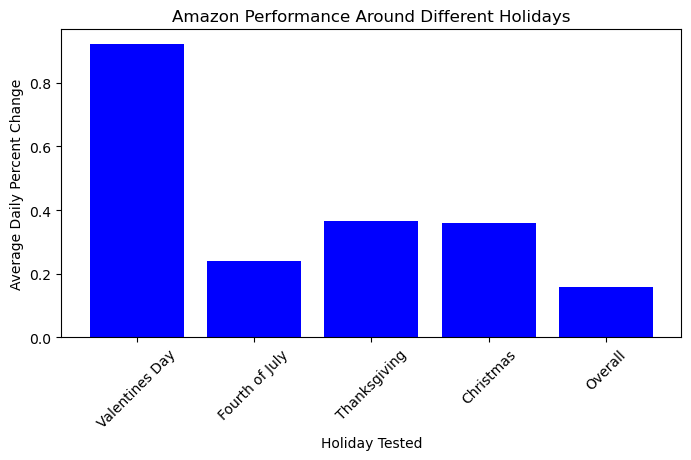

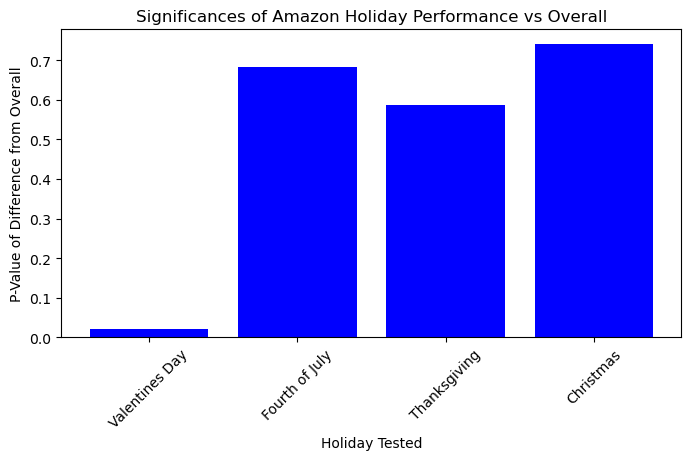

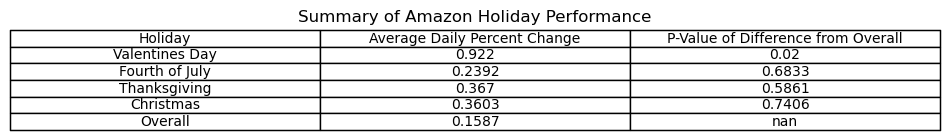

In [23]:
amzn_summary = pd.DataFrame({'Holiday': ['Valentines Day', 'Fourth of July', 'Thanksgiving', 'Christmas', 'Overall'], 
              'Average Daily Percent Change': [ave_amznva, ave_amznfj, ave_amznth, ave_amznch, ave_amznoverall], 'P-Value of Difference from Overall':[pvalue_amznva, pvalue_amznfj, pvalue_amznth, pvalue_amznch, None]})

#First, bar graph showing the daily performance around holidays is shown
plt.figure(figsize=(8, 4))
plt.bar(amzn_summary['Holiday'], amzn_summary['Average Daily Percent Change'], color='b')
plt.title('Amazon Performance Around Different Holidays')
plt.xlabel('Holiday Tested')
plt.ylabel('Average Daily Percent Change')
plt.xticks(rotation=45)
plt.savefig('amzn_holidays_pct_chg.jpg', bbox_inches="tight")
plt.show()

#Next, the p-value of the difference from the overall performance is shown
plt.figure(figsize=(8, 4))
plt.bar(amzn_summary[0:4]['Holiday'], amzn_summary[0:4]['P-Value of Difference from Overall'], color='b')
plt.title('Significances of Amazon Holiday Performance vs Overall')
plt.xlabel('Holiday Tested')
plt.ylabel('P-Value of Difference from Overall')
plt.xticks(rotation=45)
plt.savefig('amzn_holidays_pvalues_chg.jpg', bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 1.3))
plt.title('Summary of Amazon Holiday Performance')
plt.table(cellText = amzn_summary.round(4).values, colLabels= amzn_summary.columns,
              loc='center',cellLoc='center')
plt.xticks([])
plt.yticks([])
plt.savefig('amzn_holidays_table.jpg', bbox_inches="tight")
plt.show()

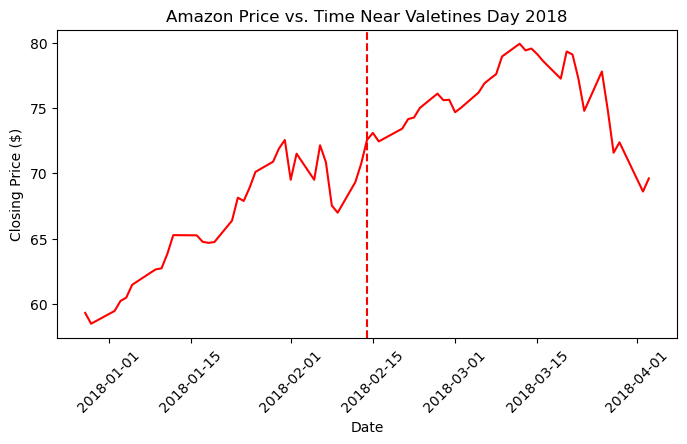

In [24]:
plt.figure(figsize=(8, 4))
plt.plot(amzn_proc.iloc[va18s-30:va18e+30]['Date'], amzn_proc.iloc[va18s-30:va18e+30]['Close'], linestyle='-', color='r')
plt.title('Amazon Price vs. Time Near Valetines Day 2018')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.xticks(rotation=45)
plt.axvline(x = datetime.datetime(2018, 2, 14), color = 'r', linestyle = '--')
plt.savefig('amzn_prices_va2018.jpg', bbox_inches="tight")
plt.show()